In [92]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### i)

In [102]:
img1 = cv.imread('taj1.jpg')
gray= cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray,None)
img=cv.drawKeypoints(gray,kp1, img1)
#cv.imwrite('sift_keypoints_puerta.jpg',img)

In [103]:
img2= cv.imread('taj2.jpg')
gray= cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp2, des2 = sift.detectAndCompute(gray,None)
img=cv.drawKeypoints(gray,kp2,img2)
#cv.imwrite('sift_keypoints_esc.jpg',img)

In [95]:
img3 = cv.imread('clo.jpeg')
gray= cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp3, des3 = sift.detectAndCompute(gray,None)
img=cv.drawKeypoints(gray,kp3,img3)
#cv.imwrite('sift_keypoints_clo.jpg',img)

In [79]:
print(f"Descriptores img1: {des1.shape}, Descriptores img2: {des2.shape}")

Descriptores img1: (1461, 128), Descriptores img2: (957, 128)


### ii)

Correspondencia entre la imagen 1 y la imagen 2

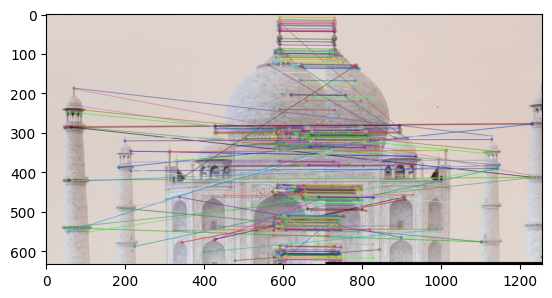

(<matplotlib.image.AxesImage at 0x1a6c9701a50>, None)

In [158]:
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
plt.imshow(img3),plt.show()

### iii)

In [105]:
src_pts = np.float32([kp1[m[0].queryIdx].pt for m in good]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m[0].trainIdx].pt for m in good]).reshape(-1, 1, 2)

# Estimar la matriz de homografía
H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)

### iv)

In [155]:
height, width = img2.shape[:2]
img_warped = cv.warpPerspective(img1, H, (width + img1.shape[1], height))

# Crear una imagen de resultado suficientemente grande para contener ambas imágenes
result = np.zeros((height, width + img1.shape[1], 3), dtype=np.uint8)

# Colocar la primera imagen transformada (homografía) y la segunda imagen en la imagen de resultado
result[0:img2.shape[0], 0:img2.shape[1]] = img2
result[0:img_warped.shape[0], img2.shape[1]:] = img_warped[:, img2.shape[1]:]

# Guardar y mostrar el resultado
cv.imwrite('panorama.jpg', result)
cv.imshow('Panorama', result)
cv.waitKey(0)


-1